### ** FINAL PROJECT
### CSC 578- 901
### AYESHA ALI** 

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

CSV PATH

In [2]:
csv_path = tf.keras.utils.get_file(
    origin='https://reed.cs.depaul.edu/peterh/Essays/Metro_Interstate_reduced.csv',
    fname='Metro_Interstate_reduced.csv',
    cache_dir='/content', cache_subdir='sample_data')

2703553/2703553 [==============================] - 0s 0us/step


Read Dataset

In [4]:
df = pd.read_csv(csv_path)

In [5]:
#checking first 5 rows of data set
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [6]:
#from tf tutorial
#Taking the data time column and will map it.
date_time = pd.to_datetime(df.pop('date_time'), format='%Y-%m-%d %H:%M:%S')

In [7]:
#checking for null values
print(df.isnull().sum())


holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64


No missing values

**Evolution of few features over time**

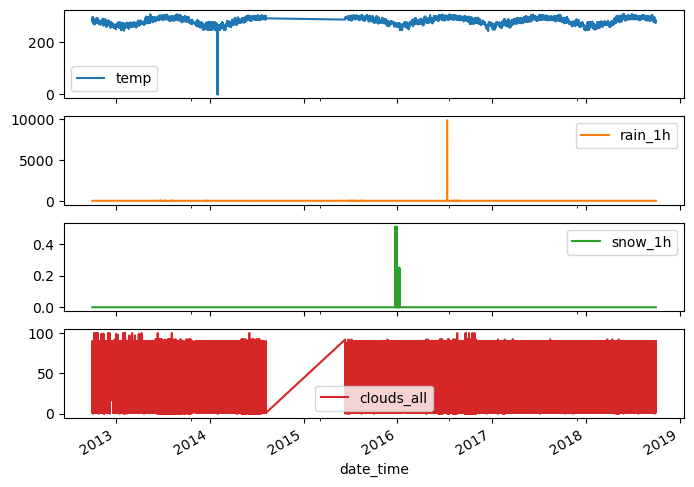

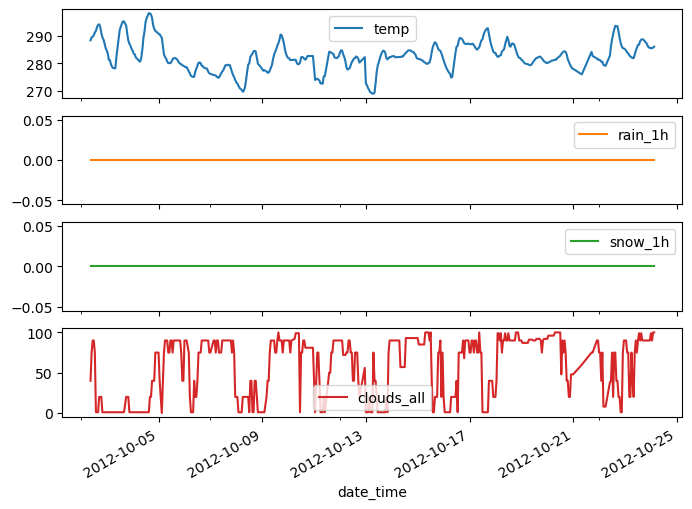

In [8]:
#from tf tutorial

plot_cols = ['temp', 'rain_1h', 'snow_1h','clouds_all']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

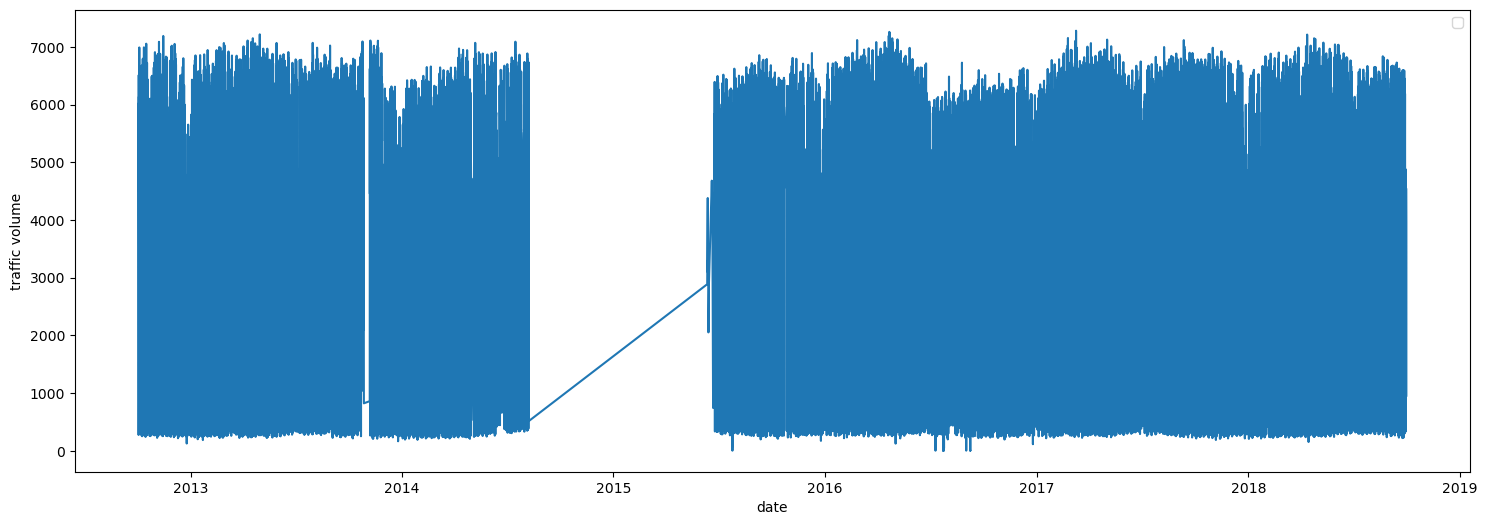

In [9]:
#plotting date vs traffic volume
plt.figure(figsize=(18,6))

plt.plot(date_time,df['traffic_volume'])
plt.xlabel('date')
plt.ylabel('traffic volume')
plt.legend()
plt.show()


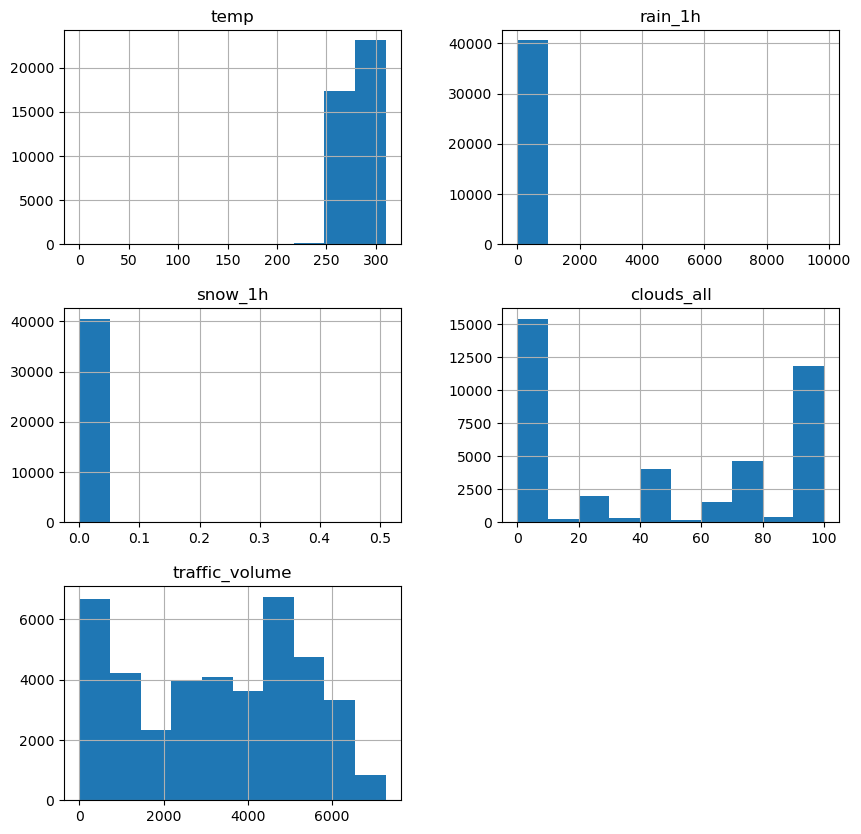

In [10]:
#generating histograms of all variables
df.hist(figsize=(10, 10))  
plt.show()

In [11]:
#checking statistics of numerical features in  dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,40575.0,281.316763,13.816618,0.0,271.84,282.86,292.28,310.07
rain_1h,40575.0,0.318632,48.812640,0.0,0.00,0.00,0.00,9831.30
snow_1h,40575.0,0.000117,0.005676,0.0,0.00,0.00,0.00,0.51
clouds_all,40575.0,44.199162,38.683447,0.0,1.00,40.00,90.00,100.00
traffic_volume,40575.0,3290.650474,1984.772909,0.0,1248.50,3427.00,4952.00,7280.00


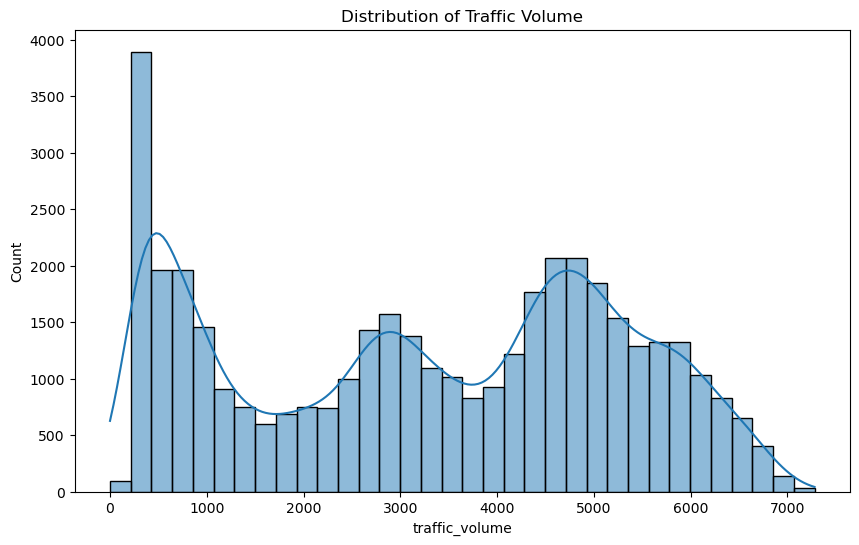

In [12]:
# Distribution of traffic_volume
plt.figure(figsize=(10,6))
sns.histplot(df['traffic_volume'], kde=True)
plt.title('Distribution of Traffic Volume')
plt.show()

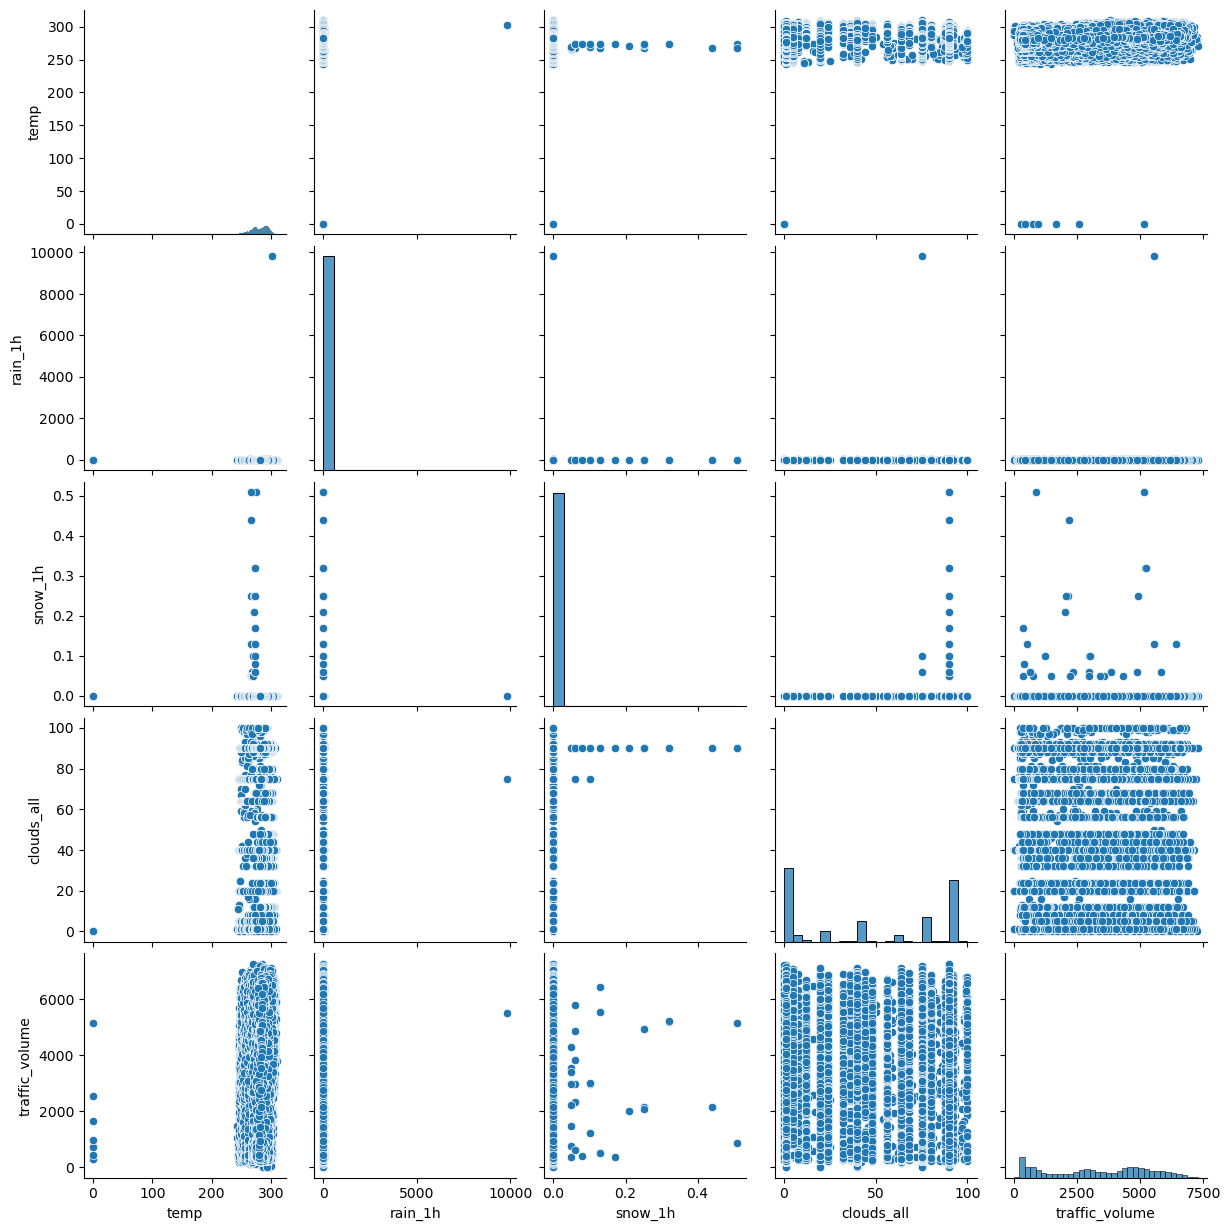

In [13]:
#Pairplot of all variables to see correlations and distributions
sns.pairplot(df)
plt.show()

/tmp/ipykernel_28/1555101867.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


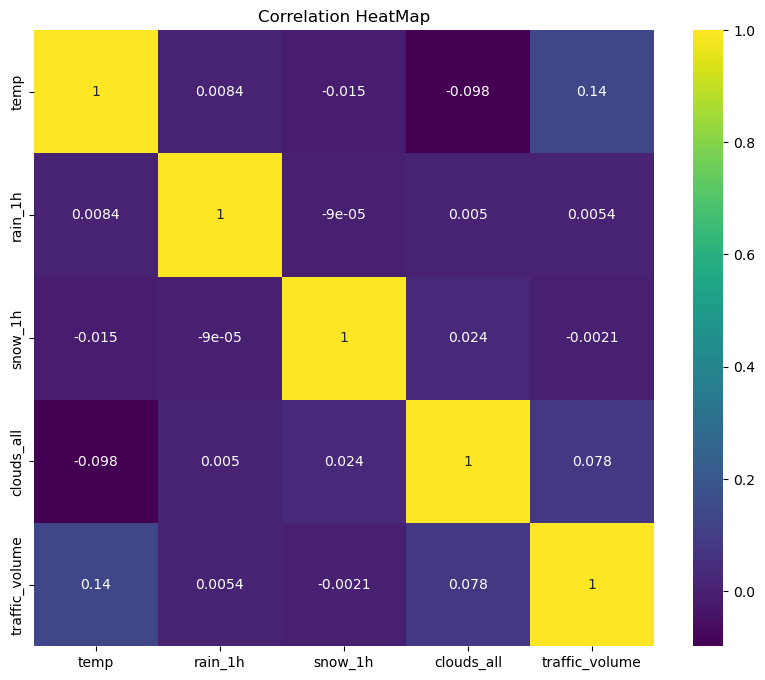

In [14]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation HeatMap')
plt.show()

The features are not correlated to each other.

**Changing data time feature**

In [15]:
#from tf tutorial
#calculating cos and sine of day year components of time
timestamp_s = date_time.map(pd.Timestamp.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

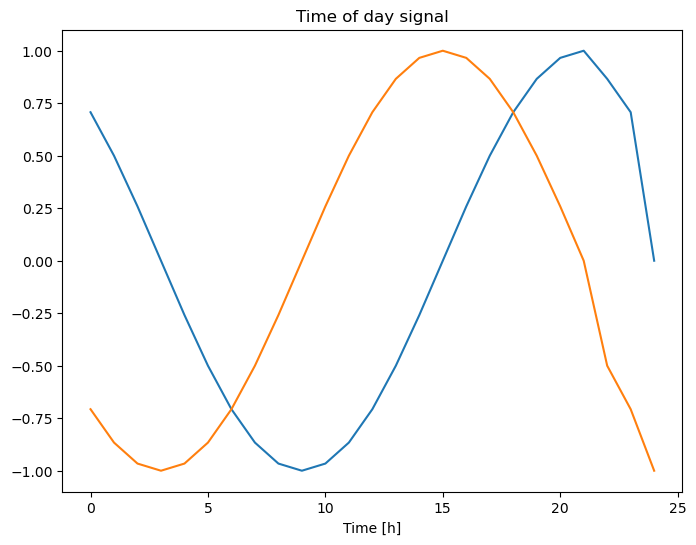

In [16]:
#from tf tutorial
#visualize the time componenets

plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

**Performing Fourier Transform and visualizing the frequency spectrum.**

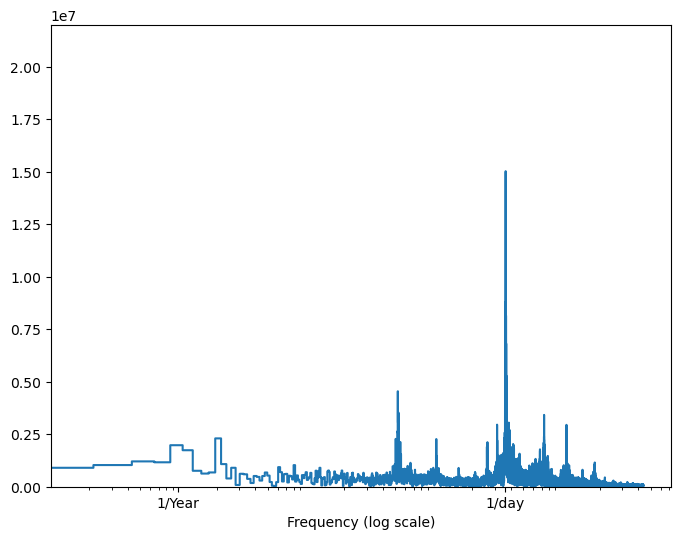

In [17]:
#from tf tutorial

fft = tf.signal.rfft(df['traffic_volume'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['traffic_volume'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 22000000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

**Normalizing the data**

In [18]:
df = df.drop(['weather_main','weather_description','holiday'],axis=1)

In [19]:
numeric_columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all','traffic_volume']

scaler = MinMaxScaler()

#Fit and transform the numerical columns using the scaler
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


**Splitting data**

In [20]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:30574]
val_df = df[30575:35574]
test_df = df[35575:]

num_features = df.shape[1]

In [21]:
train_df

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day sin,Day cos,Year sin,Year cos
0,0.929726,0.0,0.0,0.40,0.761676,7.071068e-01,-7.071068e-01,-0.999766,0.021642
1,0.933209,0.0,0.0,0.75,0.620330,5.000000e-01,-8.660254e-01,-0.999750,0.022358
2,0.933918,0.0,0.0,0.90,0.654808,2.588190e-01,-9.659258e-01,-0.999734,0.023075
3,0.935692,0.0,0.0,0.90,0.690385,1.143105e-11,-1.000000e+00,-0.999717,0.023791
4,0.938949,0.0,0.0,0.75,0.675549,-2.588190e-01,-9.659258e-01,-0.999700,0.024508
...,...,...,...,...,...,...,...,...,...
30569,0.968426,0.0,0.0,0.40,0.742857,-1.000000e+00,-1.193416e-11,-0.604456,-0.796639
30570,0.965879,0.0,0.0,0.40,0.505082,-9.659258e-01,2.588190e-01,-0.605026,-0.796205
30571,0.962944,0.0,0.0,0.40,0.426648,-8.660254e-01,5.000000e-01,-0.605597,-0.795772
30572,0.955107,0.0,0.0,0.75,0.487363,-7.071068e-01,7.071068e-01,-0.606167,-0.795337


**MODELLING**

In [22]:
#from tf tutorial
#function to window the data
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    #these are caclulated based on the provided data and columns
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}
    #
    # Work out the window parameters.
    #window parameters are stored
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [23]:
#from tf tutorial

def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [24]:
#from tf tutorial
#function to plot the window sample with label and predictions

def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                      marker='X', edgecolors='k', label='Predictions',
                      c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [25]:
#from tf tutorial
#function to slice the dataset based on window size and batch size

def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [26]:
#from tf tutorial

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [27]:
#from tf tutorial
#compile and fitting the model
#loss function - meansquarederror
# optimizer - adam
MAX_EPOCHS = 20

def compile_and_fit(model,window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

**Creating Window** 

In [28]:
#from tf tutorial
# creating window generator object of input 12 hrs and offset 3 hrs.
#this helps in creating window from the dataset

wide_window = WindowGenerator(
    input_width=12, label_width=1, shift=3,
    label_columns=['traffic_volume'])

wide_window

Total window size: 15
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [14]
Label column name(s): ['traffic_volume']

**BASELINE MODEL**

In [29]:
#TO STORE THE PERFORMANCE
val_performance = {}
performance = {}

In [30]:
#from tf tutorial

class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index
    self.reshape = tf.keras.layers.Reshape([1, -1])  # Add Reshape layer


  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [31]:
#from tf tutorial

baseline = Baseline(label_index=column_indices['traffic_volume'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])


val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

156/156 [==============================] - 1s 4ms/step - loss: 0.1825 - mean_absolute_error: 0.3652


MAE score  of 3000s

**VANILLA LSTM**

In [32]:
model = Sequential()
#lstm layer of 50 units with relu activation
model.add(LSTM(50,activation='relu'))

#dense layer of 1 unit
model.add(Dense(1))
model.add(tf.keras.layers.Reshape([1,-1])) #reshape


In [33]:
#fitting the model
history = compile_and_fit(model, wide_window)
#evaluting the performacnes for both validation and test sets
val_performance['Model'] = model.evaluate(wide_window.val)
performance['Model'] = model.evaluate(wide_window.test, verbose=0)

Epoch 1/20
955/955 [==============================] - 37s 30ms/step - loss: 0.0262 - mean_absolute_error: 0.1145 - val_loss: 0.0722 - val_mean_absolute_error: 0.2211
Epoch 2/20
955/955 [==============================] - 27s 29ms/step - loss: 0.0204 - mean_absolute_error: 0.0995 - val_loss: 0.0381 - val_mean_absolute_error: 0.1536
Epoch 3/20
955/955 [==============================] - 28s 29ms/step - loss: 0.0180 - mean_absolute_error: 0.0927 - val_loss: 0.0187 - val_mean_absolute_error: 0.1077
Epoch 4/20
955/955 [==============================] - 28s 29ms/step - loss: 0.0154 - mean_absolute_error: 0.0850 - val_loss: 0.0149 - val_mean_absolute_error: 0.0911
Epoch 5/20
955/955 [==============================] - 26s 27ms/step - loss: 0.0136 - mean_absolute_error: 0.0784 - val_loss: 0.0100 - val_mean_absolute_error: 0.0716
Epoch 6/20
955/955 [==============================] - 28s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0739 - val_loss: 0.0074 - val_mean_absolute_error: 0.0627
Epoc

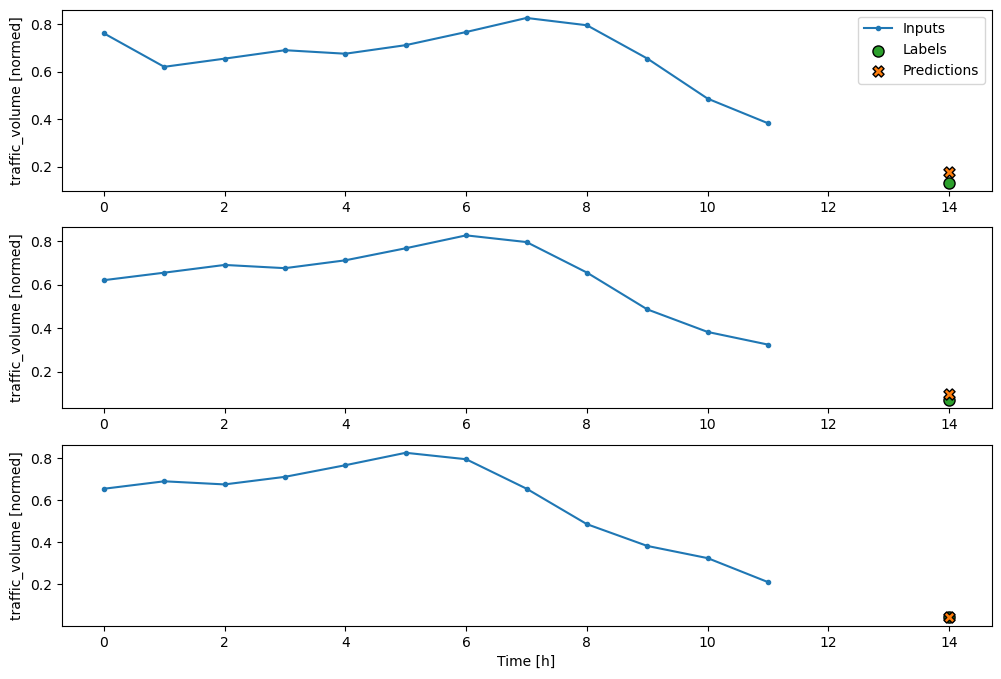

In [34]:
#plotting model performance to evaluate the predctions and true labels
wide_window.plot(model)

Got an mae score of 296

**MODEL 1**

**GENERAL LSTM LAYERS MODEL**

Model with LSTM , dropout, dense layers

In [35]:
model1=tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Reshape([1, -1])])

In [36]:
#fitting the model
history1 = compile_and_fit(model1, wide_window)
#evaluting the performacnes for both validation and test sets

val_performance['Model1'] = model1.evaluate(wide_window.val)
performance['Model1'] = model1.evaluate(wide_window.test, verbose=0)

Epoch 1/20
955/955 [==============================] - 21s 15ms/step - loss: 0.0364 - mean_absolute_error: 0.1412 - val_loss: 0.0584 - val_mean_absolute_error: 0.1815
Epoch 2/20
955/955 [==============================] - 12s 13ms/step - loss: 0.0312 - mean_absolute_error: 0.1290 - val_loss: 0.0222 - val_mean_absolute_error: 0.1073
Epoch 3/20
955/955 [==============================] - 12s 12ms/step - loss: 0.0299 - mean_absolute_error: 0.1248 - val_loss: 0.0246 - val_mean_absolute_error: 0.1118
Epoch 4/20
156/156 [==============================] - 1s 7ms/step - loss: 0.0259 - mean_absolute_error: 0.1138


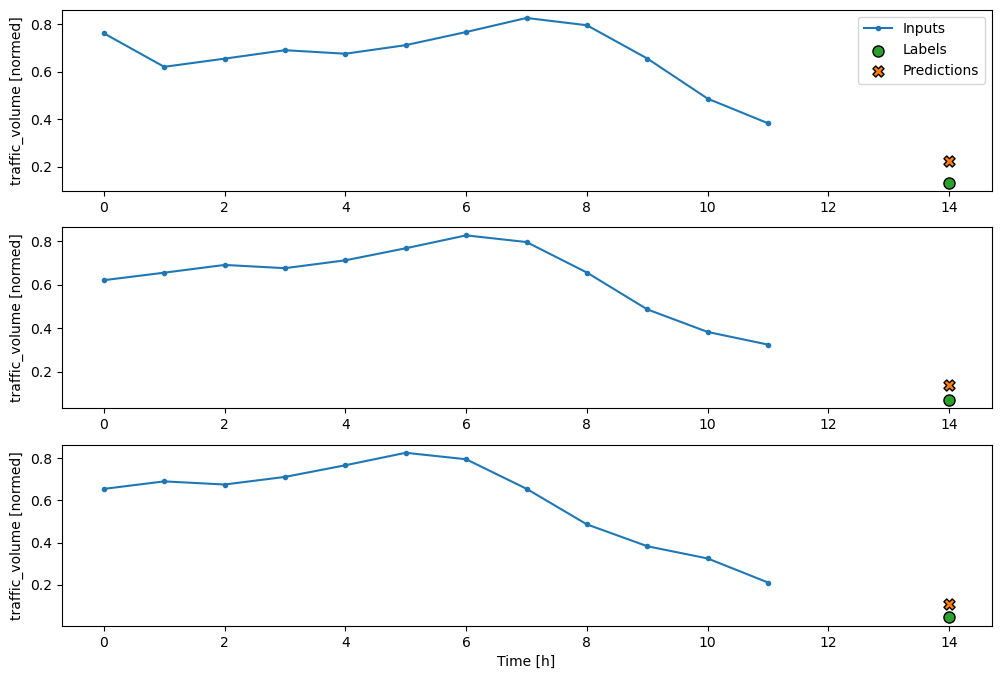

In [37]:
wide_window.plot(model1)

MAE score 691

**MODEL 2**

## **BEST MODEL ON KAGGLE**


**STACKED LSTM**

In [41]:
model2=tf.keras.models.Sequential([
    #LSTM layer with 256 units
    tf.keras.layers.LSTM(256, return_sequences=True),
    #dropout layer
    tf.keras.layers.Dropout(0.2),
    #return sequence is True, returns the whole sequence
    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.2),

    
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Reshape([1, -1]),
])

In [42]:
#fitting the model
history2 = compile_and_fit(model2, wide_window)

val_performance['Model2'] = model2.evaluate(wide_window.val)
performance['Model2'] = model2.evaluate(wide_window.test, verbose=0)

Epoch 1/20
955/955 [==============================] - 21s 15ms/step - loss: 0.0307 - mean_absolute_error: 0.1261 - val_loss: 0.0221 - val_mean_absolute_error: 0.1088
Epoch 2/20
955/955 [==============================] - 13s 13ms/step - loss: 0.0230 - mean_absolute_error: 0.1064 - val_loss: 0.0150 - val_mean_absolute_error: 0.0823
Epoch 3/20
955/955 [==============================] - 12s 13ms/step - loss: 0.0190 - mean_absolute_error: 0.0938 - val_loss: 0.0101 - val_mean_absolute_error: 0.0630
Epoch 4/20
955/955 [==============================] - 12s 13ms/step - loss: 0.0149 - mean_absolute_error: 0.0816 - val_loss: 0.0090 - val_mean_absolute_error: 0.0598
Epoch 5/20
955/955 [==============================] - 13s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0740 - val_loss: 0.0067 - val_mean_absolute_error: 0.0532
Epoch 6/20
955/955 [==============================] - 12s 13ms/step - loss: 0.0115 - mean_absolute_error: 0.0702 - val_loss: 0.0063 - val_mean_absolute_error: 0.0514
Epoc

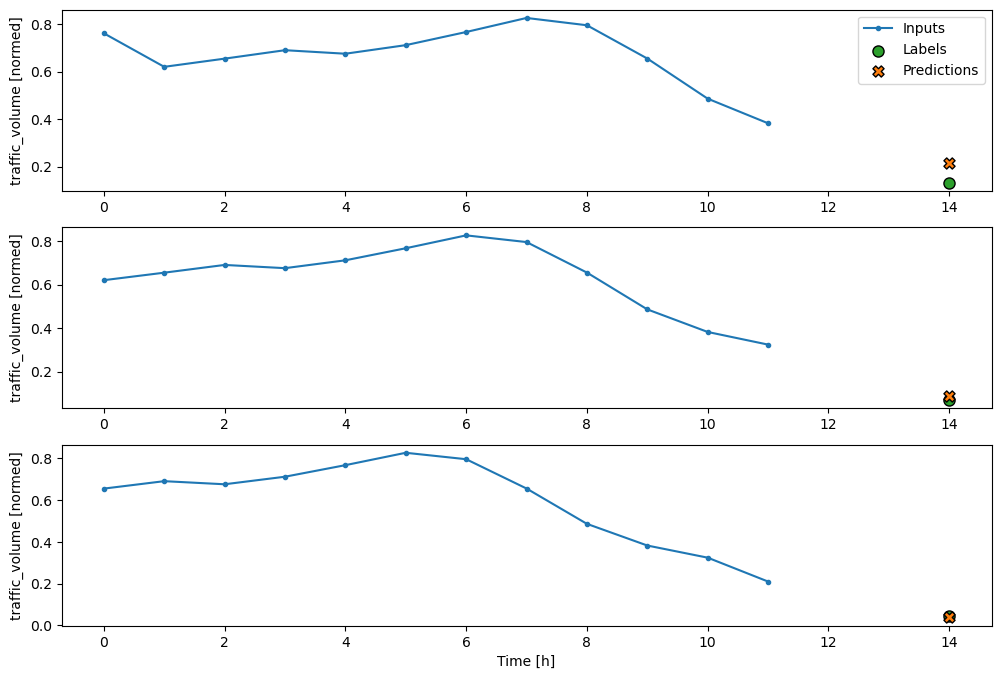

In [43]:
wide_window.plot(model2)#plotting the model


This model gave a best score of 288 on kaggle

**MODEL 3** 
**CNN , LSTM, GRU**

In [44]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(64, return_sequences=True),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Reshape([1, -1])
])

In [45]:
#fitting the model
history3 = compile_and_fit(model3, wide_window)

val_performance['Model3'] = model3.evaluate(wide_window.val)
performance['Model3'] = model3.evaluate(wide_window.test, verbose=0)

Epoch 1/20
955/955 [==============================] - 31s 15ms/step - loss: 0.0341 - mean_absolute_error: 0.1387 - val_loss: 0.0295 - val_mean_absolute_error: 0.1299
Epoch 2/20
955/955 [==============================] - 13s 14ms/step - loss: 0.0236 - mean_absolute_error: 0.1101 - val_loss: 0.0211 - val_mean_absolute_error: 0.1003
Epoch 3/20
955/955 [==============================] - 12s 13ms/step - loss: 0.0200 - mean_absolute_error: 0.1002 - val_loss: 0.0112 - val_mean_absolute_error: 0.0738
Epoch 4/20
955/955 [==============================] - 14s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0912 - val_loss: 0.0219 - val_mean_absolute_error: 0.0919
Epoch 5/20
955/955 [==============================] - 13s 13ms/step - loss: 0.0149 - mean_absolute_error: 0.0840 - val_loss: 0.0076 - val_mean_absolute_error: 0.0632
Epoch 6/20
955/955 [==============================] - 13s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0786 - val_loss: 0.0139 - val_mean_absolute_error: 0.0729
Epoc

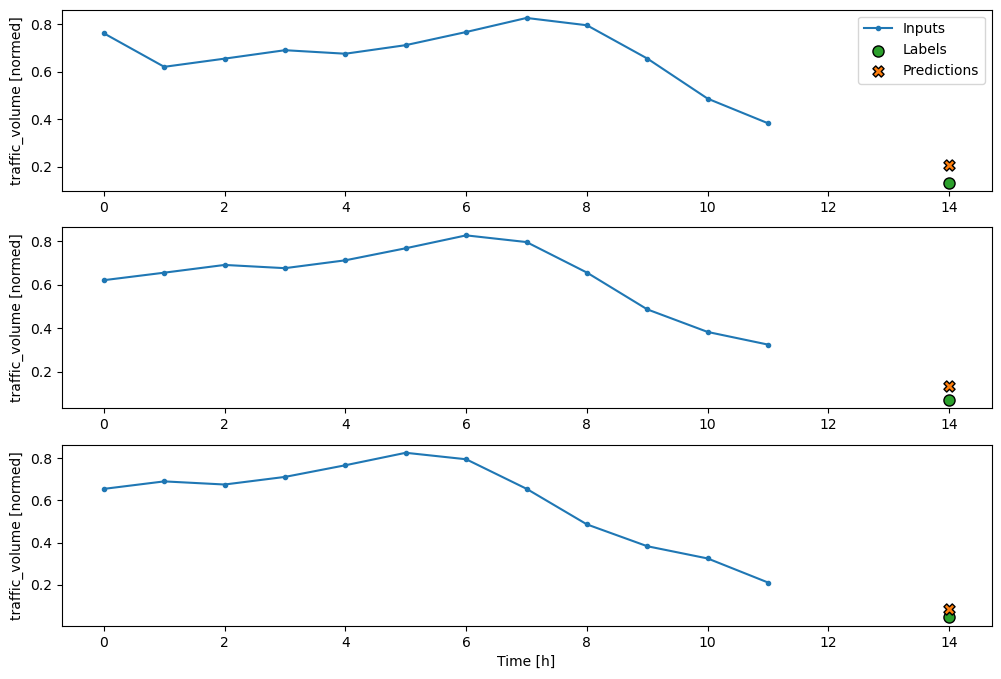

In [46]:
wide_window.plot(model3)#plotting the model


MAE score of 326

**MODEL 4**

### **2nd BEST MODEL**

**BIDIRECTIONAL LSTM**

In [47]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200,return_sequences=True)),  #hBidirectional LSTM layer 
    #dropout 0.2
    tf.keras.layers.Dropout(0.2), 

    tf.keras.layers.LSTM(200,return_sequences=True),

    tf.keras.layers.LSTM(200,return_sequences=True),
    tf.keras.layers.Dense(1),  
    tf.keras.layers.Reshape([1, -1])  # Reshaping 
])

In [48]:
#fitting the model
history4 = compile_and_fit(model4, wide_window)

val_performance['Model4'] = model4.evaluate(wide_window.val)
performance['Model4'] = model4.evaluate(wide_window.test, verbose=0)

Epoch 1/20
955/955 [==============================] - 25s 17ms/step - loss: 0.0280 - mean_absolute_error: 0.1195 - val_loss: 0.0188 - val_mean_absolute_error: 0.0960
Epoch 2/20
955/955 [==============================] - 14s 15ms/step - loss: 0.0217 - mean_absolute_error: 0.1029 - val_loss: 0.0214 - val_mean_absolute_error: 0.1010
Epoch 3/20
955/955 [==============================] - 15s 16ms/step - loss: 0.0197 - mean_absolute_error: 0.0955 - val_loss: 0.0165 - val_mean_absolute_error: 0.0854
Epoch 4/20
955/955 [==============================] - 15s 15ms/step - loss: 0.0174 - mean_absolute_error: 0.0877 - val_loss: 0.0153 - val_mean_absolute_error: 0.0807
Epoch 5/20
955/955 [==============================] - 15s 16ms/step - loss: 0.0157 - mean_absolute_error: 0.0823 - val_loss: 0.0181 - val_mean_absolute_error: 0.0821
Epoch 6/20
955/955 [==============================] - 15s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0789 - val_loss: 0.0116 - val_mean_absolute_error: 0.0666
Epoc

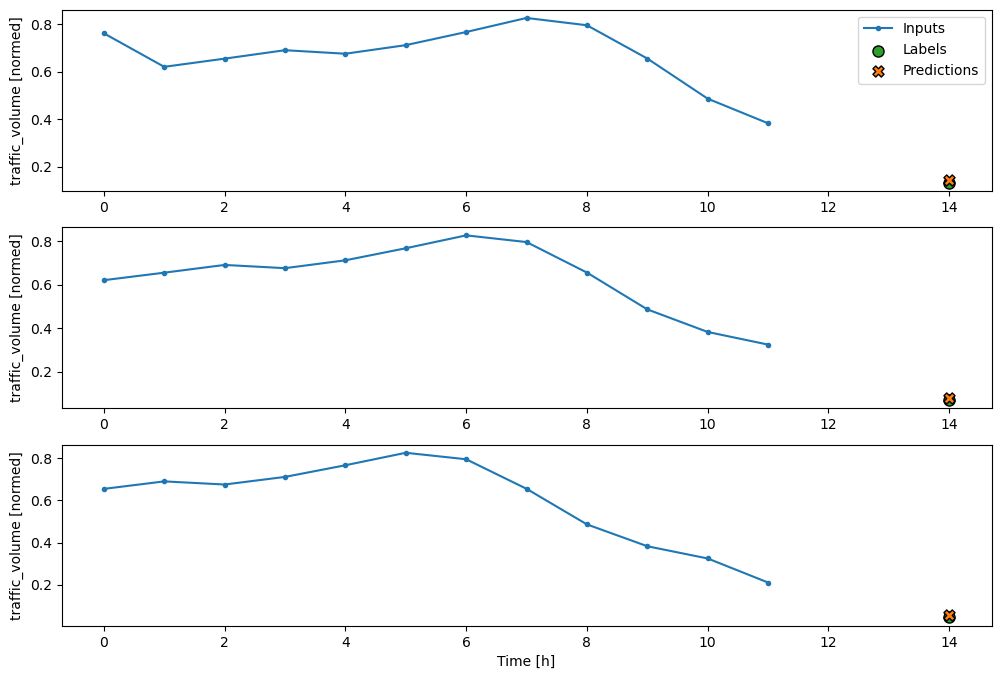

In [49]:
wide_window.plot(model4)

##### MAE score of 298

**MODEL 5**

**CONVU1D + LSTM**


In [50]:
from keras.layers import Lambda
model5 = Sequential()
model5.add(Conv1D(64,3, activation='relu'))
model5.add(MaxPooling1D())
model5.add(LSTM(200, return_sequences=True))
model5.add(LSTM(200, return_sequences=True))
model5.add(Dropout(0.2))
model5.add(LSTM(100))
model5.add(Dropout(0.2))
model5.add(Dense(1))
model5.add(Dense(1))
model5.add(Dense(1))
model5.add(tf.keras.layers.Reshape([1, -1]) ) 


In [51]:
#fitting the model
history5 = compile_and_fit(model5, wide_window)

val_performance['Model5'] = model5.evaluate(wide_window.val)
performance['Model5'] = model5.evaluate(wide_window.test, verbose=0)

Epoch 1/20
955/955 [==============================] - 21s 14ms/step - loss: 0.0320 - mean_absolute_error: 0.1331 - val_loss: 0.0319 - val_mean_absolute_error: 0.1408
Epoch 2/20
955/955 [==============================] - 13s 13ms/step - loss: 0.0231 - mean_absolute_error: 0.1082 - val_loss: 0.0148 - val_mean_absolute_error: 0.0805
Epoch 3/20
955/955 [==============================] - 13s 13ms/step - loss: 0.0178 - mean_absolute_error: 0.0918 - val_loss: 0.0116 - val_mean_absolute_error: 0.0711
Epoch 4/20
955/955 [==============================] - 12s 13ms/step - loss: 0.0139 - mean_absolute_error: 0.0794 - val_loss: 0.0066 - val_mean_absolute_error: 0.0553
Epoch 5/20
955/955 [==============================] - 13s 13ms/step - loss: 0.0123 - mean_absolute_error: 0.0737 - val_loss: 0.0085 - val_mean_absolute_error: 0.0625
Epoch 6/20
156/156 [==============================] - 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0582


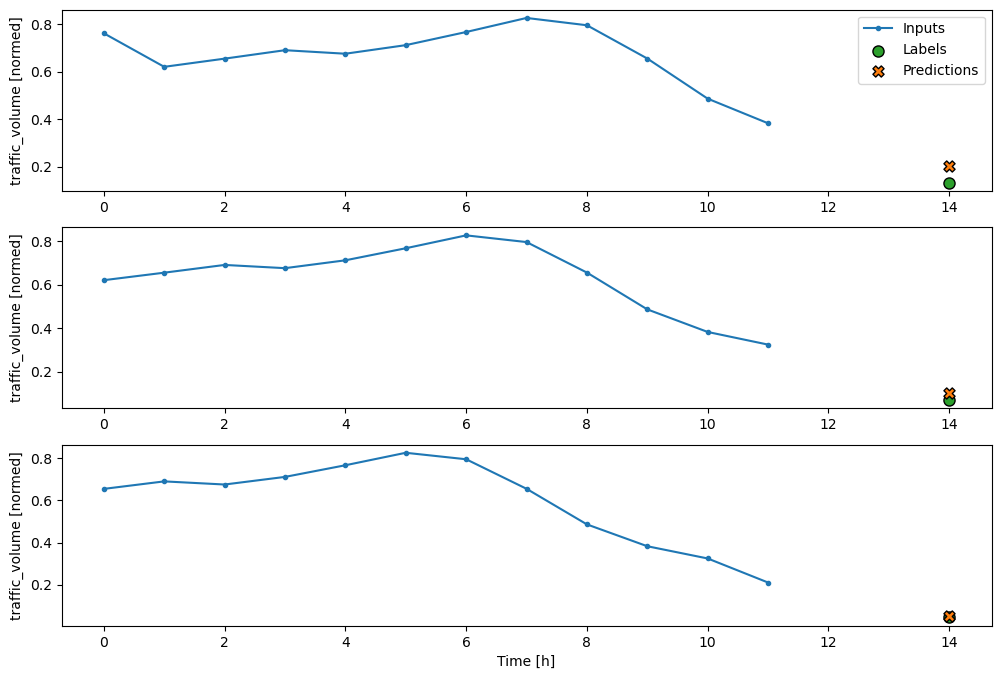

In [52]:
wide_window.plot(model5)

MAE error of 328

**MODEL 6**

**CONV1d + RNN + GRU**

In [53]:
#inspired from tf tutorial
CONV_WIDTH = 3
model6 = tf.keras.Sequential([
 
    tf.keras.layers.Conv1D(32, activation='relu', kernel_size=(CONV_WIDTH)),

    tf.keras.layers.Conv1D(64, activation='relu', kernel_size=(CONV_WIDTH)),
    tf.keras.layers.Conv1D(128, activation='relu', kernel_size=(CONV_WIDTH)),
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),

    tf.keras.layers.Lambda(lambda x: x[:,-CONV_WIDTH:,:]),


 
    tf.keras.layers.Dense(3*9,
                          kernel_initializer=tf.initializers.zeros()),


    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.Dropout(0.2),



    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.GRU(32),
    
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1), 

    tf.keras.layers.Reshape([1, -1])
])

In [54]:
#fitting the model
history6 = compile_and_fit(model6, wide_window)

val_performance['Model6'] = model6.evaluate(wide_window.val)
performance['Model6'] = model6.evaluate(wide_window.test, verbose=0)

Epoch 1/20
955/955 [==============================] - 32s 21ms/step - loss: 0.0410 - mean_absolute_error: 0.1517 - val_loss: 0.0225 - val_mean_absolute_error: 0.1090
Epoch 2/20
955/955 [==============================] - 16s 17ms/step - loss: 0.0261 - mean_absolute_error: 0.1159 - val_loss: 0.0234 - val_mean_absolute_error: 0.1134
Epoch 3/20
955/955 [==============================] - 17s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.1117 - val_loss: 0.0199 - val_mean_absolute_error: 0.1006
Epoch 4/20
955/955 [==============================] - 16s 17ms/step - loss: 0.0229 - mean_absolute_error: 0.1054 - val_loss: 0.0197 - val_mean_absolute_error: 0.0989
Epoch 5/20
955/955 [==============================] - 17s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.1023 - val_loss: 0.0175 - val_mean_absolute_error: 0.0928
Epoch 6/20
955/955 [==============================] - 16s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0996 - val_loss: 0.0155 - val_mean_absolute_error: 0.0829
Epoc

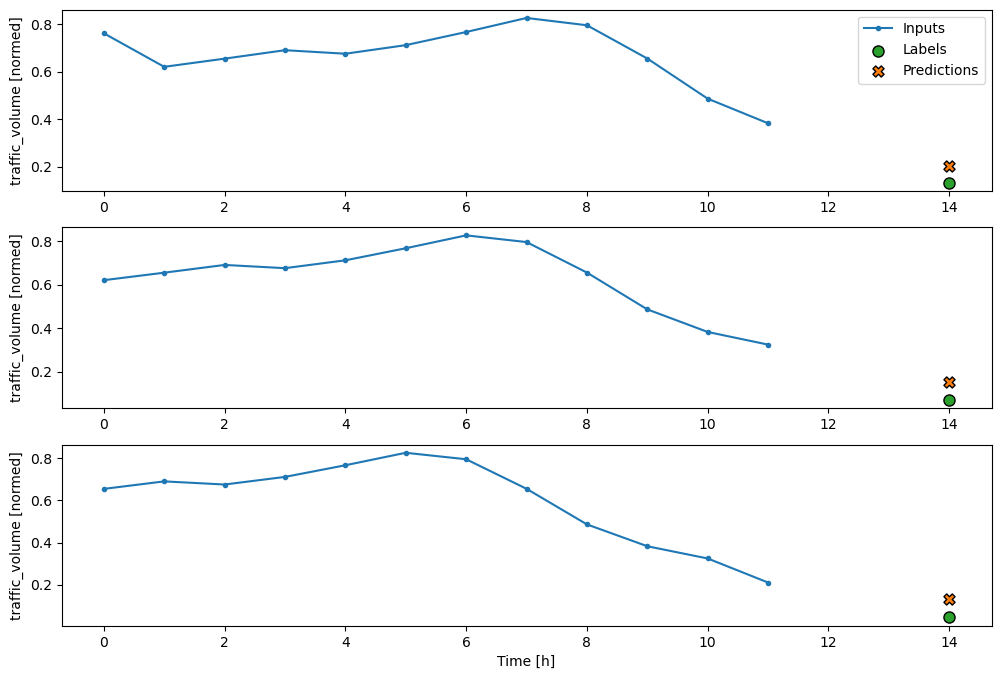

In [55]:
wide_window.plot(model6)

MAE error  677

**MODEL 7**

**CONV1d + GRU + BIdrectional LSTm**

In [56]:
CONV_WIDTH = 3

model7 = tf.keras.Sequential([
   
    tf.keras.layers.Conv1D(32, activation='relu', kernel_size=(CONV_WIDTH)),

    tf.keras.layers.Conv1D(64, activation='relu', kernel_size=(CONV_WIDTH)),
    tf.keras.layers.Conv1D(128, activation='relu', kernel_size=(CONV_WIDTH)),
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),

    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),


    tf.keras.layers.Dense(3*9,
                          kernel_initializer=tf.initializers.zeros()),
  
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),

    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.Dropout(0.2),


    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),

    tf.keras.layers.Reshape([1, -1])
])



In [57]:
#fitting the model
history7 = compile_and_fit(model7, wide_window)

val_performance['Model7'] = model7.evaluate(wide_window.val)
performance['Model7'] = model7.evaluate(wide_window.test, verbose=0)

Epoch 1/20
955/955 [==============================] - 42s 26ms/step - loss: 0.0312 - mean_absolute_error: 0.1292 - val_loss: 0.0361 - val_mean_absolute_error: 0.1331
Epoch 2/20
955/955 [==============================] - 22s 24ms/step - loss: 0.0230 - mean_absolute_error: 0.1086 - val_loss: 0.0176 - val_mean_absolute_error: 0.0924
Epoch 3/20
955/955 [==============================] - 22s 23ms/step - loss: 0.0195 - mean_absolute_error: 0.0984 - val_loss: 0.0121 - val_mean_absolute_error: 0.0819
Epoch 4/20
955/955 [==============================] - 24s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0869 - val_loss: 0.0132 - val_mean_absolute_error: 0.0753
Epoch 5/20
955/955 [==============================] - 22s 23ms/step - loss: 0.0135 - mean_absolute_error: 0.0797 - val_loss: 0.0082 - val_mean_absolute_error: 0.0667
Epoch 6/20
955/955 [==============================] - 22s 23ms/step - loss: 0.0123 - mean_absolute_error: 0.0760 - val_loss: 0.0076 - val_mean_absolute_error: 0.0611
Epoc

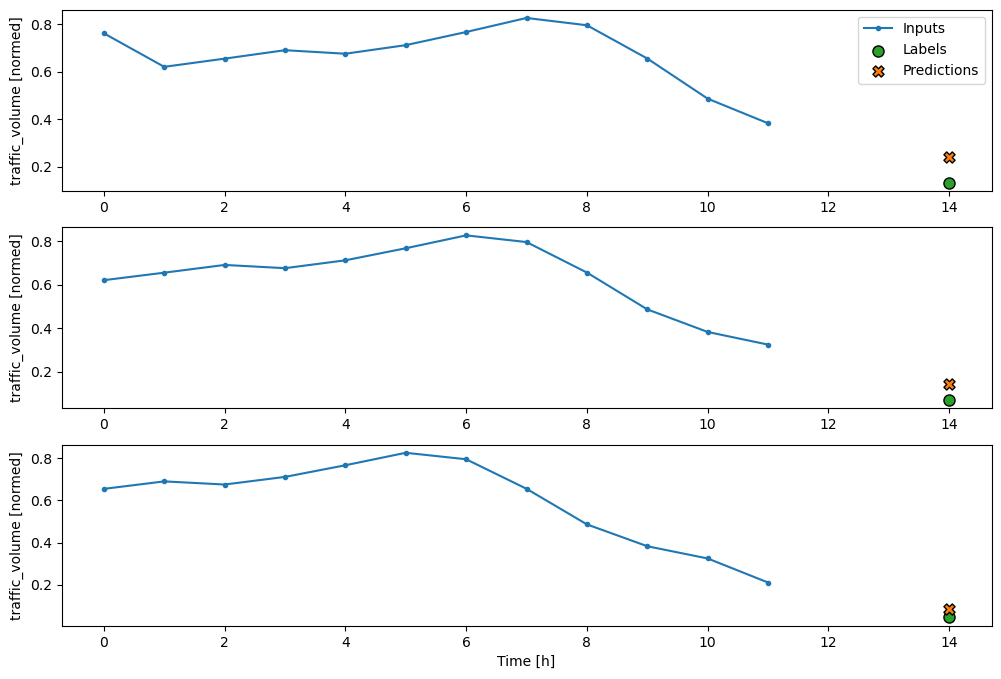

In [58]:
wide_window.plot(model7)

MAE error 412

**MODEL 8**

In [59]:
CONV_WIDTH = 3

model8 = tf.keras.Sequential([
    
    tf.keras.layers.Conv1D(32, activation='relu', kernel_size=(CONV_WIDTH)),

    tf.keras.layers.Conv1D(64, activation='relu', kernel_size=(CONV_WIDTH)),
    tf.keras.layers.Conv1D(128, activation='relu', kernel_size=(CONV_WIDTH)),
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),

    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),

    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),


   
    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.LSTM(128, return_sequences=True),
    

    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.GRU(64, return_sequences=True),

    tf.keras.layers.GRU(32),
    tf.keras.layers.Dropout(0.2),
    

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='relu'),

    tf.keras.layers.Reshape([1, -1])
])



In [60]:
#fitting the model
history8 = compile_and_fit(model8, wide_window)

val_performance['Model8'] = model8.evaluate(wide_window.val)
performance['Model8'] = model8.evaluate(wide_window.test, verbose=0)

Epoch 1/20
955/955 [==============================] - 30s 18ms/step - loss: 0.0305 - mean_absolute_error: 0.1260 - val_loss: 0.0408 - val_mean_absolute_error: 0.1389
Epoch 2/20
955/955 [==============================] - 15s 16ms/step - loss: 0.0246 - mean_absolute_error: 0.1112 - val_loss: 0.0176 - val_mean_absolute_error: 0.0940
Epoch 3/20
955/955 [==============================] - 16s 17ms/step - loss: 0.0226 - mean_absolute_error: 0.1060 - val_loss: 0.0188 - val_mean_absolute_error: 0.0954
Epoch 4/20
156/156 [==============================] - 1s 8ms/step - loss: 0.0225 - mean_absolute_error: 0.1028


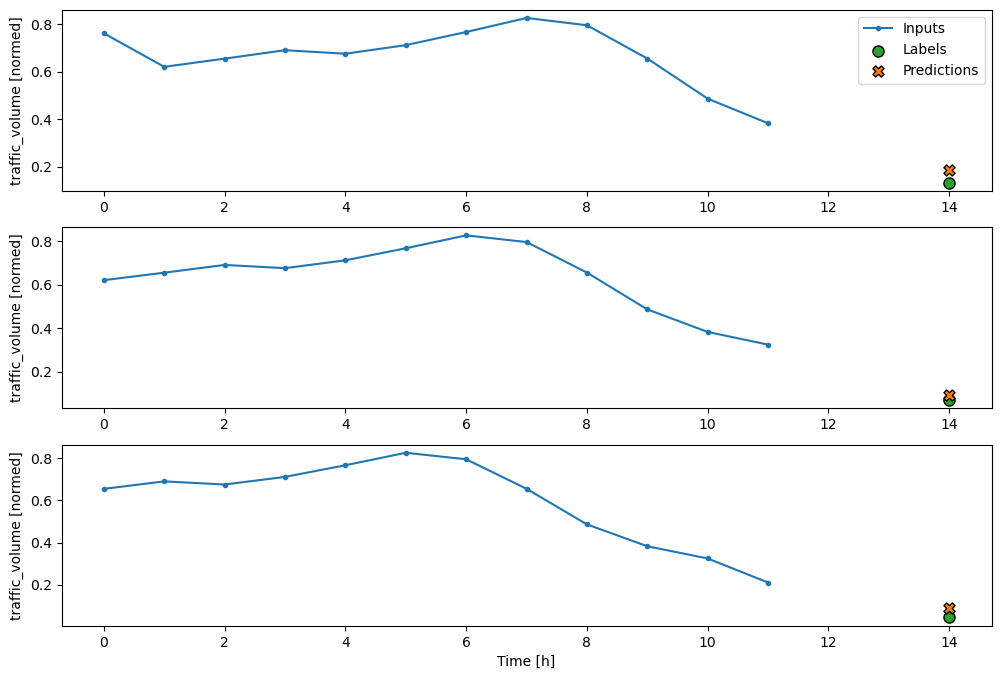

In [61]:
wide_window.plot(model8)

MAE error 574

**MODEL 9**

**SIMPLE RNN MODEL**

In [87]:
from keras.layers import RNN, SimpleRNN
model9 = Sequential()

model9.add(SimpleRNN(100, activation='relu', return_sequences = True))
model9.add(LSTM(32, return_sequences=True))
model9.add(LSTM(32, return_sequences=True))
model9.add(Dropout(0.2))


model9.add(Dense(1, activation='relu'))
model9.add(Dense(1, activation='relu'))
model9.add(tf.keras.layers.Reshape([1, -1]))



In [88]:
#fitting the model
history9 = compile_and_fit(model9, wide_window)

val_performance['Model8'] = model9.evaluate(wide_window.val)
performance['Model8'] = model8.evaluate(wide_window.test, verbose=0)

Epoch 1/20
955/955 [==============================] - 26s 21ms/step - loss: 0.0390 - mean_absolute_error: 0.1470 - val_loss: 0.0384 - val_mean_absolute_error: 0.1440
Epoch 2/20
955/955 [==============================] - 20s 21ms/step - loss: 0.0313 - mean_absolute_error: 0.1295 - val_loss: 0.0278 - val_mean_absolute_error: 0.1236
Epoch 3/20
955/955 [==============================] - 19s 20ms/step - loss: 0.0290 - mean_absolute_error: 0.1230 - val_loss: 0.0308 - val_mean_absolute_error: 0.1285
Epoch 4/20
955/955 [==============================] - 20s 21ms/step - loss: 0.0274 - mean_absolute_error: 0.1182 - val_loss: 0.0222 - val_mean_absolute_error: 0.1108
Epoch 5/20
955/955 [==============================] - 20s 21ms/step - loss: 0.0257 - mean_absolute_error: 0.1133 - val_loss: 0.0164 - val_mean_absolute_error: 0.0939
Epoch 6/20
955/955 [==============================] - 19s 20ms/step - loss: 0.0241 - mean_absolute_error: 0.1085 - val_loss: 0.0151 - val_mean_absolute_error: 0.0878
Epoc

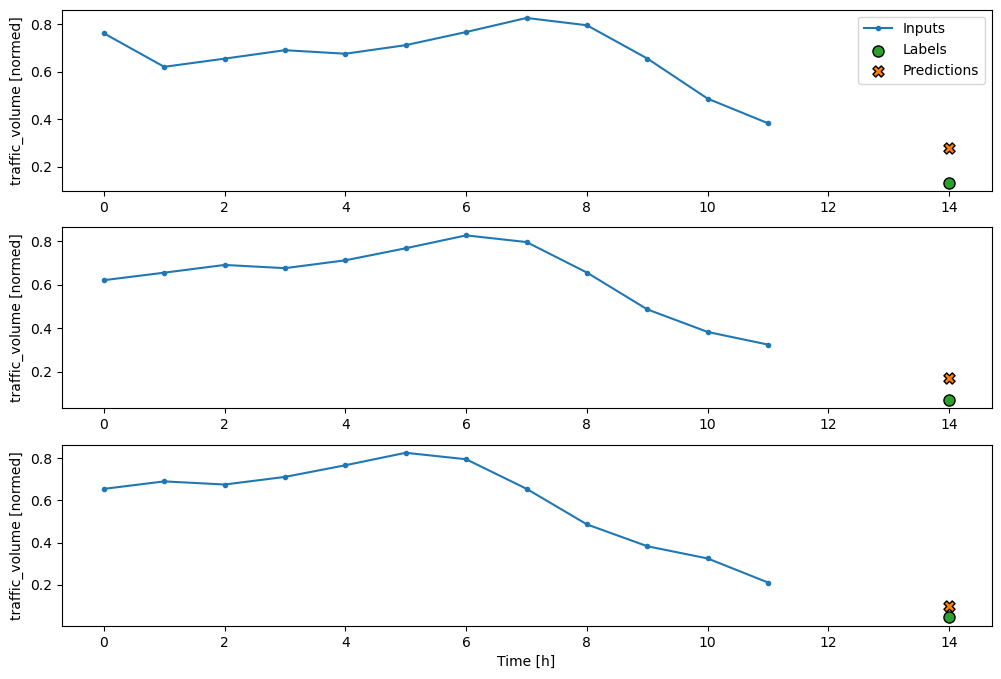

In [89]:
wide_window.plot(model9)

MAE error 612

**PLOT**

**Training MAE of models**

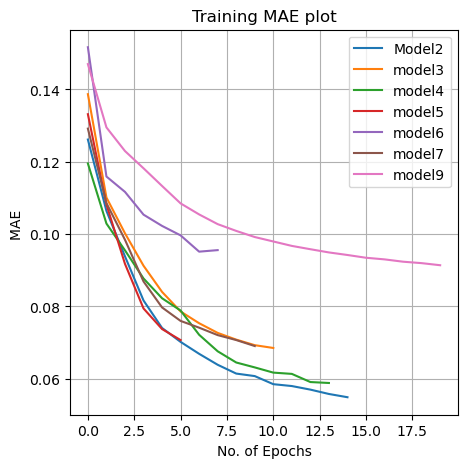

In [105]:
model_names = ['Model2','model3','model4','model5','model6','model7','model9']
histories = [history2.history, history3.history, history4.history,history5.history,history6.history,history7.history,history9.history]

plt.figure(figsize=(5,5))

for i, history in enumerate(histories):
    val_loss = history['mean_absolute_error']
    plt.plot(val_loss, label=model_names[i])

plt.xlabel('No. of Epochs')
plt.ylabel('MAE ')
plt.legend(loc='upper right')
plt.title('Training MAE plot')
plt.grid(True)
plt.show()

**PLOT**

**Training Loss of models**

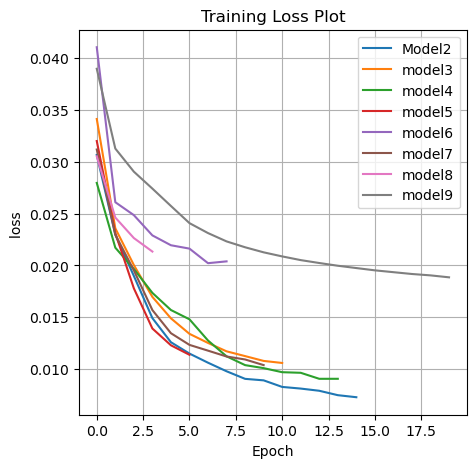

In [101]:
model_names = ['Model2','model3','model4','model5','model6','model7','model8','model9']
histories = [history2.history, history3.history, history4.history,history5.history,history6.history,history7.history,history8.history,history9.history]

plt.figure(figsize=(5,5))

for i, history in enumerate(histories):
    loss = history['loss']
    plt.plot(loss,label=model_names[i])

plt.xlabel('Epoch')
plt.ylabel('loss ')
plt.legend(loc='upper right')
plt.title('Training Loss Plot')
plt.grid(True)
plt.show()

**PLOT**

**Validaiton MAE of models**

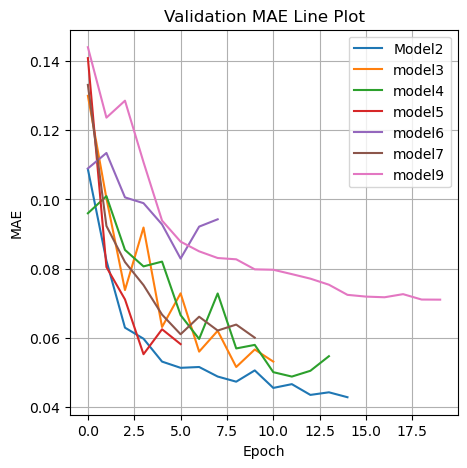

In [102]:
model_names = ['Model2','model3','model4','model5','model6','model7','model9']
histories = [history2.history, history3.history, history4.history,history5.history,history6.history,history7.history,history9.history]

plt.figure(figsize=(5,5))

for i, history in enumerate(histories):
    val_mea = history['val_mean_absolute_error']
    plt.plot(val_mea, label=model_names[i])

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.title('Validation MAE Line Plot')
plt.grid(True)
plt.show()

**PLOT**

**Validation Loss of models**

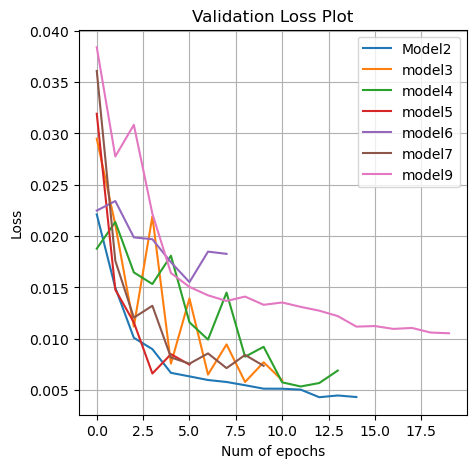

In [104]:
model_names = ['Model2','model3','model4','model5','model6','model7','model9']
histories = [history2.history, history3.history, history4.history,history5.history,history6.history,history7.history,history9.history]

plt.figure(figsize=(5,5))

for i, history in enumerate(histories):
    val_loss = history['val_loss']
    plt.plot(val_loss, label=model_names[i])

plt.xlabel('Num of epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Validation Loss Plot')
plt.grid(True)
plt.show()

**GENERATING PREDICTIONS FOR THE BEST MODEL**

In [69]:
predictions =model3.predict(wide_window.test)
predictions =predictions.squeeze()

#indices starting from 35589 to 40575
selected_indexes = np.arange(35589, 40575).tolist()

predictions_daf = pd.DataFrame({'id':selected_indexes,'prediction':predictions})

#denormalizing the traffic volumen prediciton using its max and min value

predictions_daf['prediction'] = predictions_daf['prediction']*(7280.00-0)+ 0

predictions_daf.to_csv('prediction.csv',index=False)

156/156 [==============================] - 2s 6ms/step
